In [2]:
# Import librerie
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Varianza spiegata da ciascuna componente PCA:
  PC1: 0.4427
  PC2: 0.1897
  PC3: 0.0939
  PC4: 0.0660
  PC5: 0.0550
  PC6: 0.0402
  PC7: 0.0225
  PC8: 0.0159
  PC9: 0.0139
  PC10: 0.0117
  PC11: 0.0098
  PC12: 0.0087
  PC13: 0.0080
  PC14: 0.0052
  PC15: 0.0031
  PC16: 0.0027
  PC17: 0.0020
  PC18: 0.0018
  PC19: 0.0016
  PC20: 0.0010
  PC21: 0.0010
  PC22: 0.0009
  PC23: 0.0008
  PC24: 0.0006
  PC25: 0.0005
  PC26: 0.0003
  PC27: 0.0002
  PC28: 0.0001
  PC29: 0.0000
  PC30: 0.0000


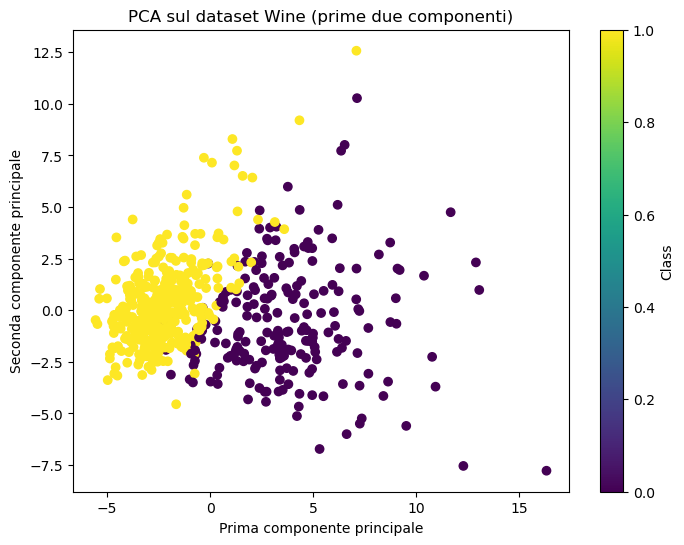

In [12]:
# 1. Caricamento dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Standardizzazione (PCA richiede feature con scale comparabili)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA (prendiamo tutte le componenti ma poi plottiamo solo le prime 2)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza spiegata
explained_var = pca.explained_variance_ratio_

print("Varianza spiegata da ciascuna componente PCA:")
for i, v in enumerate(explained_var):
    print(f"  PC{i+1}: {v:.4f}")

# 4. Scatter plot delle prime due componenti
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")
plt.title("PCA sul dataset Wine (prime due componenti)")
plt.colorbar(label='Class')
plt.show()

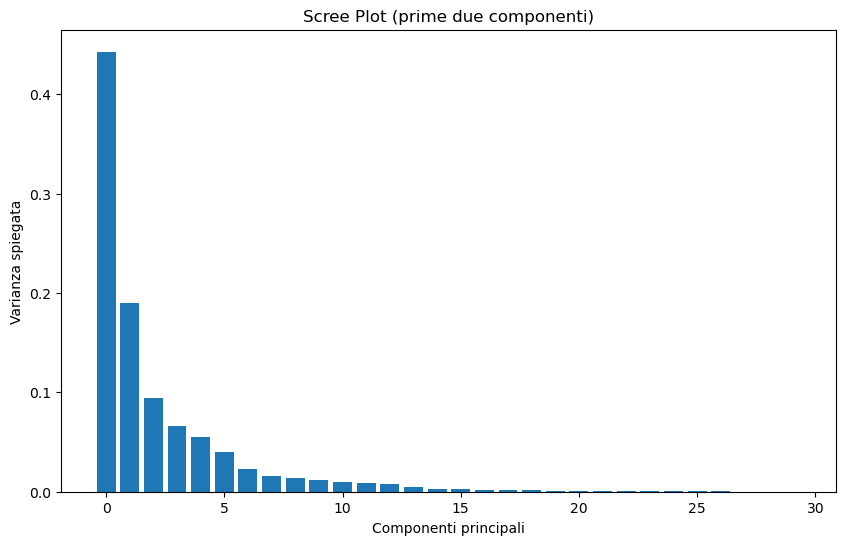

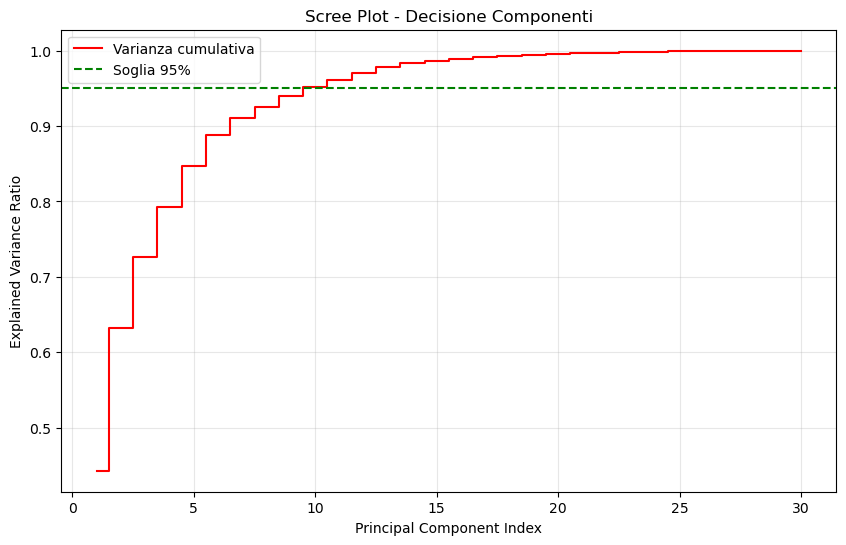

In [44]:
import numpy as np
# Scree plot (informazione delle componenti)
N_comp = np.arange(len(explained_var))

plt.figure(figsize=(10, 6))
plt.bar(N_comp, explained_var)
plt.xlabel("Componenti principali")
plt.ylabel("Varianza spiegata")
plt.title("Scree Plot (prime due componenti)")
plt.show()

#  Scree Plot cumulato
exp_var_pca = explained_var
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(10, 6))
#plt.bar(range(1, len(exp_var_pca) + 1), exp_var_pca, alpha=0.5, label='Varianza individuale')
plt.step(range(1, len(cum_sum_eigenvalues) + 1), cum_sum_eigenvalues, where='mid', label='Varianza cumulativa', color='red')
plt.axhline(y=0.95, color='green', linestyle='--', label='Soglia 95%')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Scree Plot - Decisione Componenti')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# 1️⃣ Caricamento dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2️⃣ Standardizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Divisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 4️⃣ Random Forest su tutte le feature
rf_all = LogisticRegressionCV(Cs = [0.1, 0.4, 1 , 4, 10, 20],random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)
print(f"Accuratezza RF usando tutte le feature: {acc_all:.4f}")

# 5️⃣ PCA - scelta del numero di componenti
n_components = 2  # puoi cambiare a piacere
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# 6️⃣ Divisione in train/test dopo PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# 7️⃣ Random Forest sulle componenti principali
rf_pca = LogisticRegressionCV(Cs = [0.1, 0.4, 1 , 4, 10, 20], random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuratezza RF usando le prime {n_components} componenti PCA: {acc_pca:.4f}")

Accuratezza RF usando tutte le feature: 0.9825
Accuratezza RF usando le prime 2 componenti PCA: 0.9532


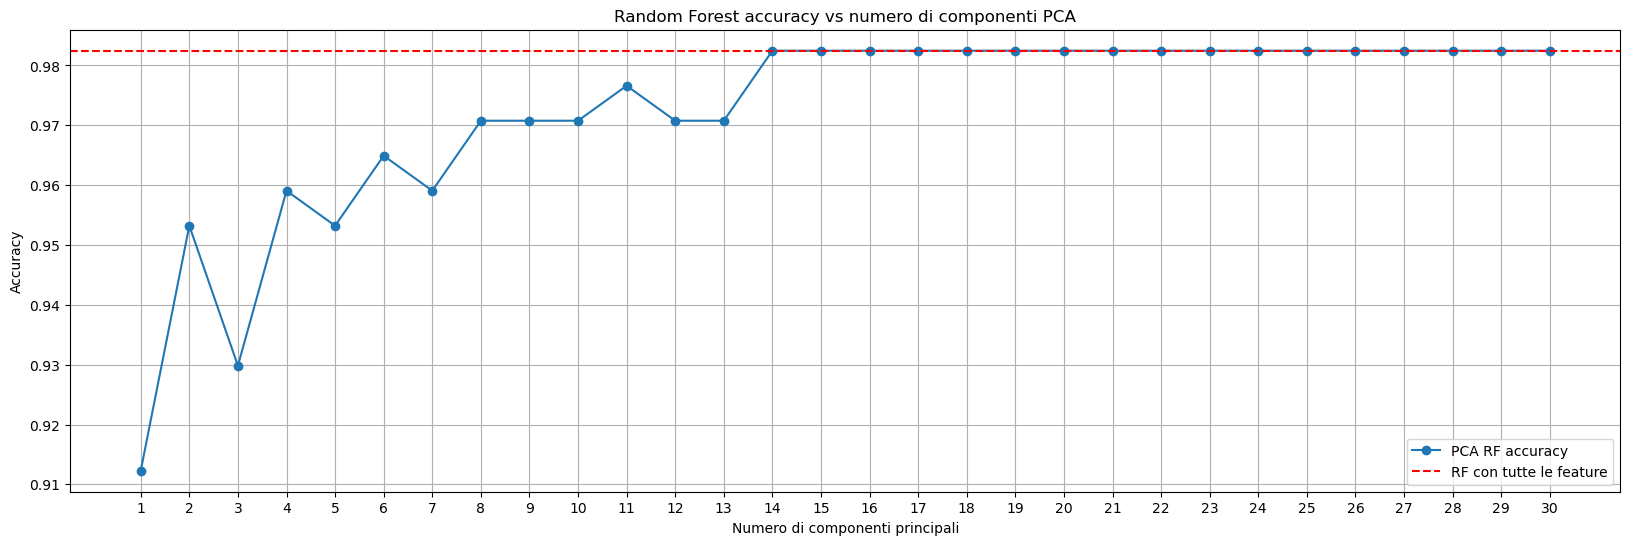

In [25]:
accuracies = []
n_features = X_scaled.shape[1]

for n_components in range(1, n_features + 1):
    pca = PCA(n_components = n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X_pca, y, test_size=0.3, random_state=42, stratify=y
    )
    
    rf_pca = LogisticRegressionCV(Cs = [0.1, 0.4, 1 , 4, 10, 20],random_state=42)
    rf_pca.fit(X_train_pca, y_train_pca)
    acc = accuracy_score(y_test_pca, rf_pca.predict(X_test_pca))
    accuracies.append(acc)

# 4️⃣ Plot accuracies
plt.figure(figsize=(20,6))
plt.plot(range(1, n_features + 1), accuracies, marker='o', label='PCA RF accuracy')
plt.axhline(y=acc_all, color='r', linestyle='--', label='RF con tutte le feature')
plt.xticks(range(1, n_features + 1))
plt.xlabel("Numero di componenti principali")
plt.ylabel("Accuracy")
plt.title("Random Forest accuracy vs numero di componenti PCA")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import itertools
# 1️⃣ Feature engeneering pesante
df_eng = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

math_cols = df_eng.columns
 # A. MOLTIPLICAZIONI
for col1, col2 in itertools.combinations(math_cols, 2):
    col_name = f'MULT_{col1}_x_{col2}'
    df_eng[col_name] = df_eng[col1] * df_eng[col2]

# B. DIVISIONI
for col1, col2 in itertools.permutations(math_cols, 2):
    col_name = f'RATIO_{col1}_div_{col2}'
    df_eng[col_name] = df_eng[col1] / (df_eng[col2] + 1e-5)

C:\Users\m-rog\AppData\Local\Temp\ipykernel_15812\768810153.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_eng[col_name] = df_eng[col1] * df_eng[col2]
C:\Users\m-rog\AppData\Local\Temp\ipykernel_15812\768810153.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_eng[col_name] = df_eng[col1] * df_eng[col2]
C:\Users\m-rog\AppData\Local\Temp\ipykernel_15812\768810153.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

In [10]:
len(df_eng.columns)

1335

In [26]:
# 2️⃣ Standardizzazione
scaler = StandardScaler()
X_scaled_eng = scaler.fit_transform(df_eng)

# 3️⃣ Divisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_eng, y, test_size=0.3, random_state=42, stratify=y
)

# 4️⃣ Log regression su tutte le feature
rf_all = RandomForestClassifier(n_estimators= 100,random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)
print(f"Accuratezza RF usando tutte le feature: {acc_all:.4f}")

# 5️⃣ PCA - scelta del numero di componenti
n_components = 2  # puoi cambiare a piacere
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# 6️⃣ Divisione in train/test dopo PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# 7️⃣ Log regression sulle componenti principali
rf_pca = RandomForestClassifier(n_estimators= 100,random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuratezza RF usando le prime {n_components} componenti PCA: {acc_pca:.4f}")

Accuratezza RF usando tutte le feature: 0.9649
Accuratezza RF usando le prime 2 componenti PCA: 0.9474


c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

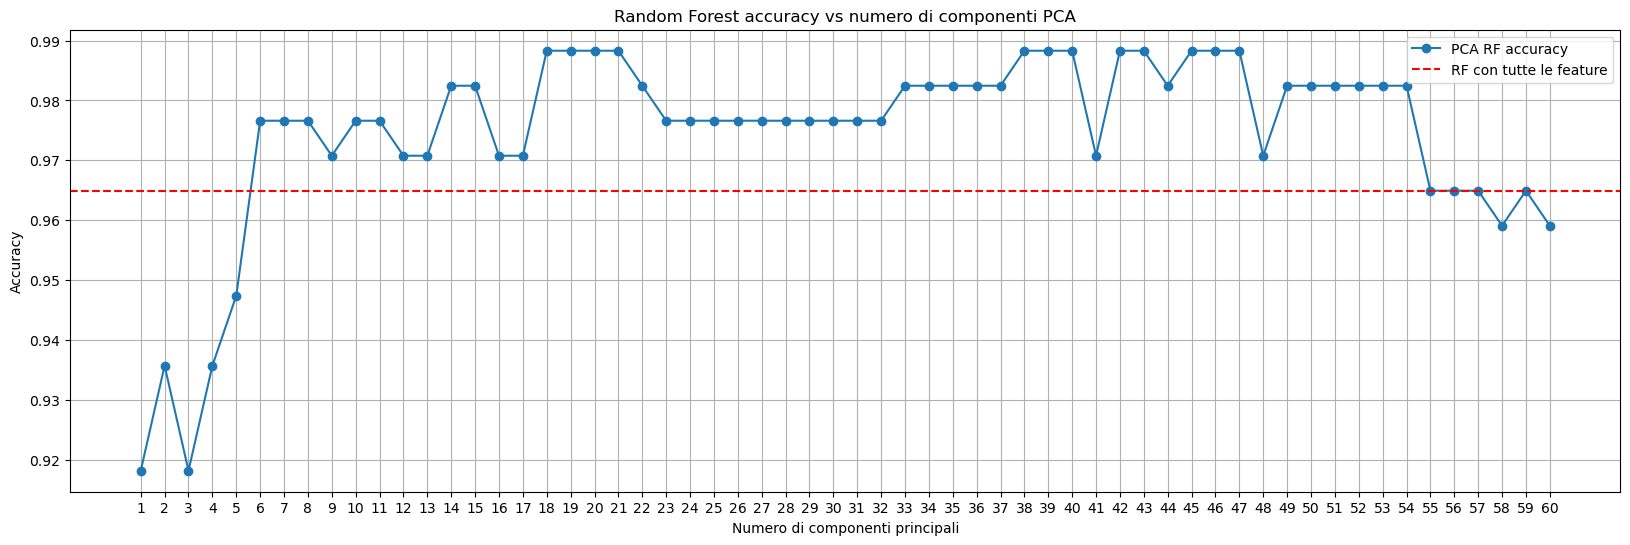

In [27]:
accuracies = []
n_features = 60

for n_components in range(1, n_features + 1):
    pca = PCA(n_components = n_components)
    X_pca = pca.fit_transform(X_scaled_eng)
    
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X_pca, y, test_size=0.3, random_state=42, stratify=y
    )
    
    rf_pca = LogisticRegressionCV(Cs = [0.1, 0.4, 1 , 4, 10, 20],random_state=42)
    rf_pca.fit(X_train_pca, y_train_pca)
    acc = accuracy_score(y_test_pca, rf_pca.predict(X_test_pca))
    accuracies.append(acc)

# 4️⃣ Plot accuracies
plt.figure(figsize=(20,6))
plt.plot(range(1, n_features + 1), accuracies, marker='o', label='PCA RF accuracy')
plt.axhline(y=acc_all, color='r', linestyle='--', label='RF con tutte le feature')
plt.xticks(range(1, n_features + 1))
plt.xlabel("Numero di componenti principali")
plt.ylabel("Accuracy")
plt.title("Random Forest accuracy vs numero di componenti PCA")
plt.legend()
plt.grid(True)
plt.show()

## loads per wines datasets

C:\Users\m-rog\AppData\Local\Temp\ipykernel_7828\1200809585.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')  # Cambiala come vuoi: 'tab10', 'Set3', 'rainbow', ...


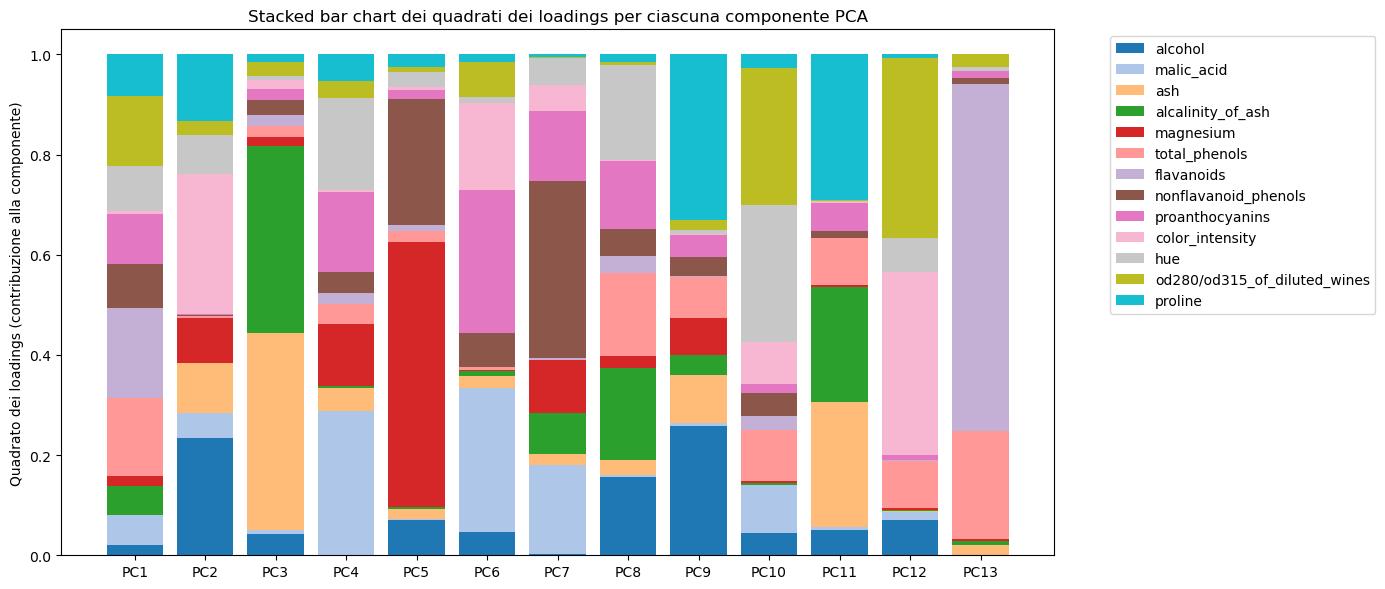

In [7]:
import matplotlib.cm as cm
# 1. Carico i dati
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Standardizzo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA (tutte le componenti)
pca = PCA()
pca.fit(X_scaled)

# 4. Costruisco una tabella con i loadings
loadings = pd.DataFrame(
    pca.components_.T,           # trasposta: righe=feature, colonne=componenti
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=X.columns
)

# Loadings: righe = feature, colonne = PC
loadings = pca.components_.T    # shape (n_features, n_components)

# Quadrati dei loadings
loading_sq = loadings**2

# Preparazione del plot
pcs = [f"PC{i+1}" for i in range(loading_sq.shape[1])]
features = X.columns

plt.figure(figsize=(14,6))

bottom = np.zeros(loading_sq.shape[1])

cmap = cm.get_cmap('tab20')  # Cambiala come vuoi: 'tab10', 'Set3', 'rainbow', ...
colors = [cmap(i / len(features)) for i in range(len(features))]

for i, feature in enumerate(features):
    plt.bar(pcs, loading_sq[i], bottom=bottom, label=feature, color = colors[i])
    bottom += loading_sq[i]

plt.ylabel("Quadrato dei loadings (contribuzione alla componente)")
plt.title("Stacked bar chart dei quadrati dei loadings per ciascuna componente PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()